In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris=pd.read_csv("C:\\Users\\navee\\Downloads\\iris_data.csv")

In [89]:
#total number of rows and columns
iris.shape

(150, 5)

In [90]:
#column names
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [91]:
#top 10 entries of the data set
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [92]:
#bottom 10 entries of the data set
iris.tail(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [93]:
#basic statistical description of the data set
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.000000,149.000000,149.000000,150.000000
mean,5.853691,3.064430,3.753020,1.199333
std,0.821051,0.428554,1.770195,0.762238
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
#For all the species, the respective values of the mean and median of it’s features are found to be pretty close. 
#This indicates that data is nearly symmetrically distributed with very less presence of outliers.

iris.groupby('Species').agg(['mean', 'median'])

Sepal.Length        Sepal.Width        Petal.Length         \
                   mean median        mean median         mean median   
Species                                                                 
setosa         5.020408    5.0    3.428000    3.4     1.462000   1.50   
versicolor     5.936000    5.9    2.785714    2.8     4.255102   4.30   
virginica      6.588000    6.5    2.974000    3.0     5.552000   5.55   

           Petal.Width         
                  mean median  
Species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

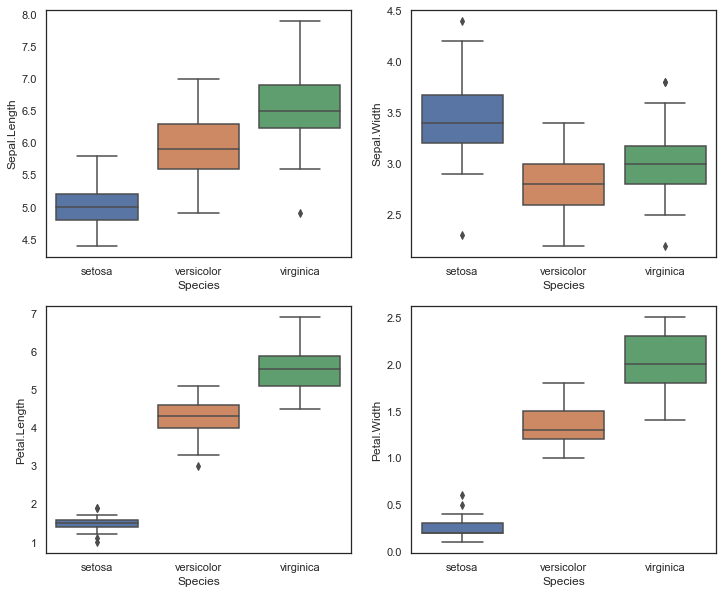

In [95]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='Sepal.Length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='Sepal.Width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='Petal.Length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='Petal.Width',data=iris)
plt.show()

In [96]:
#no. of data points for each species
#balanced data set since equal number of entries for each specie
iris['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [97]:
#checking for missing values
print(pd.isnull(iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width','Species']]).sum())

Sepal.Length    1
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64


In [111]:
#replacing null values with the median
iris['Sepal.Length'] = iris['Sepal.Length'].fillna((iris['Sepal.Length'].median()))
iris['Sepal.Width'] = iris['Sepal.Width'].fillna((iris['Sepal.Width'].median()))
iris['Petal.Length'] = iris['Petal.Length'].fillna((iris['Petal.Length'].median()))

In [112]:
print(pd.isnull(iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width','Species']]).sum())

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


In [113]:
iris_setosa = iris[iris['Species'] == 'setosa']
iris_versicolor = iris[iris['Species'] == 'versicolor']
iris_virginica = iris[iris['Species'] == 'virginica']

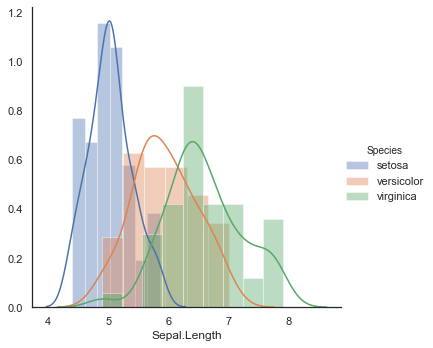

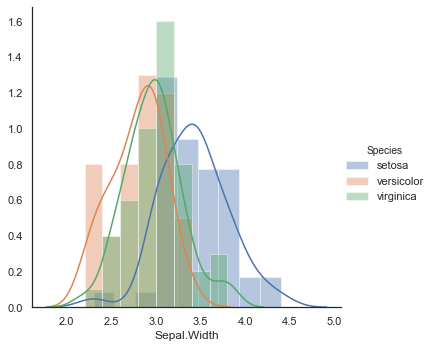

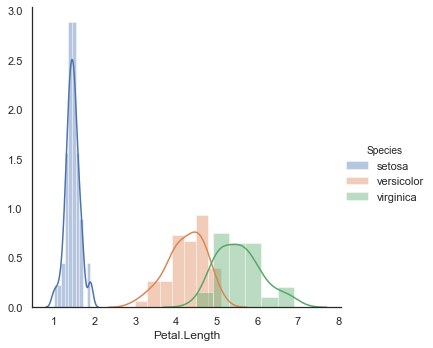

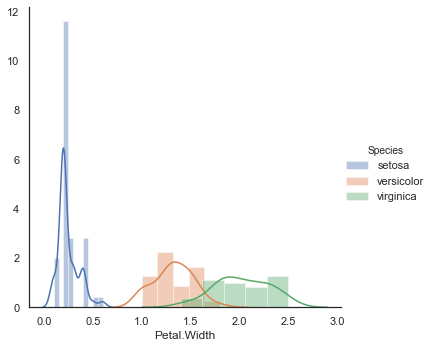

In [114]:
#univariate analysis
#To summarize, if we have to choose one feature for classification, we will pick petal length to distinguish among the species. 
#If we have to select two features, then we will choose petal width as the second feature.

sns.FacetGrid(iris, hue="Species", height=5).map(sns.distplot, "Sepal.Length").add_legend();
sns.FacetGrid(iris, hue="Species", height=5).map(sns.distplot, "Sepal.Width").add_legend();
sns.FacetGrid(iris, hue="Species", height=5).map(sns.distplot, "Petal.Length").add_legend();
sns.FacetGrid(iris, hue="Species", height=5).map(sns.distplot, "Petal.Width").add_legend();
plt.show()

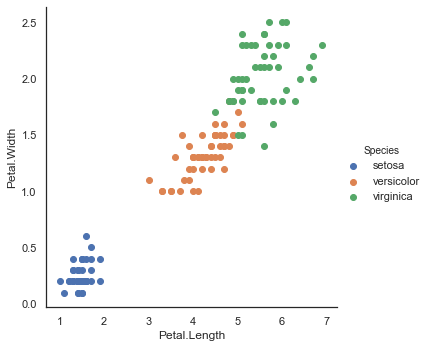

In [115]:
#bivariate
sns.FacetGrid(iris,hue="Species",height=5).map(plt.scatter,"Petal.Length","Petal.Width").add_legend()

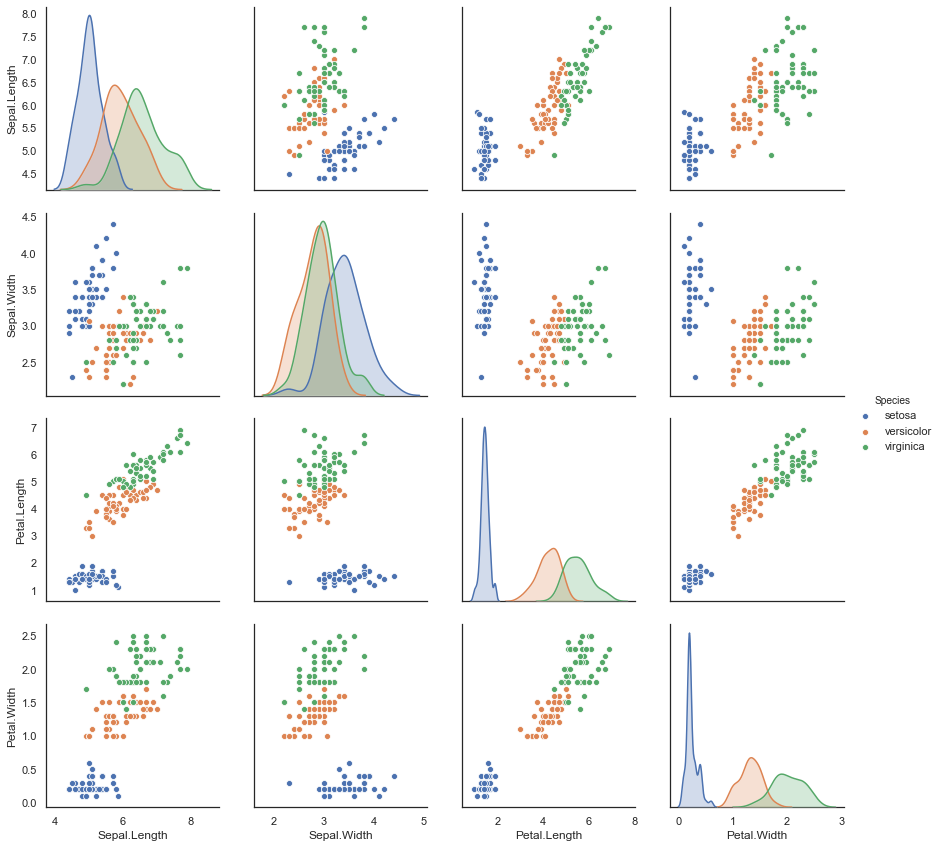

In [116]:
#pairplot for all features
sns.pairplot(iris,hue="Species",height=3)

Based on the univariate analaysis and taking petal length as a feature to distinguish between the species
If petal length < 2.1
then specie = ‘Setosa’
else if petal length > 2.1 and petal length < 4.8
then specie = ‘Versicolor’
else if petal length > 4.8
then specie = ‘Virginica’

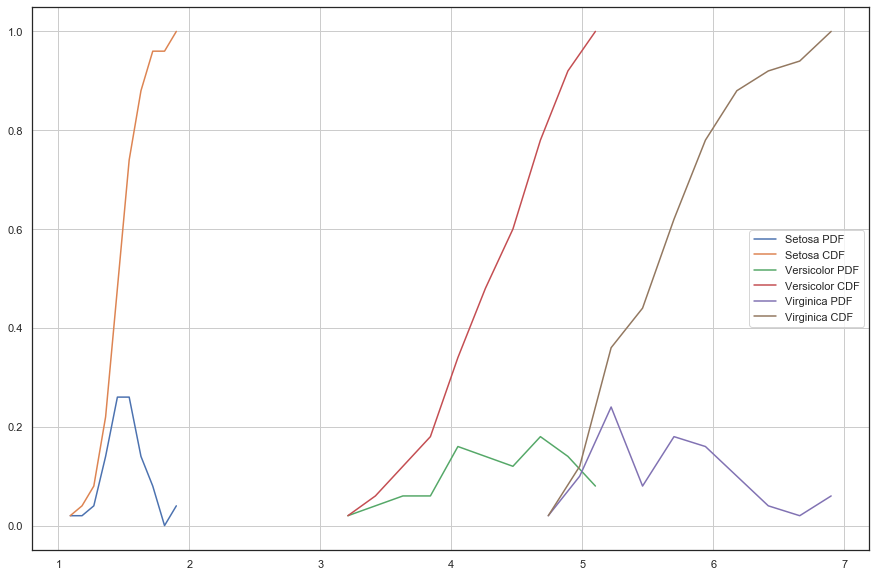

In [117]:
#Using Cumulative Distribution Function (CDF) plots to quantify the proportion of misclassified flowers in above analysis
plt.figure(figsize=(15,10))
counts, bin_edges = np.histogram(iris_setosa['Petal.Length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Setosa PDF')
plt.plot(bin_edges[1:], cdf, label = 'Setosa CDF')
counts, bin_edges = np.histogram(iris_versicolor['Petal.Length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Versicolor PDF')
plt.plot(bin_edges[1:], cdf, label = 'Versicolor CDF')
counts, bin_edges = np.histogram(iris_virginica['Petal.Length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Virginica PDF')
plt.plot(bin_edges[1:], cdf, label = 'Virginica CDF')
plt.legend()
plt.grid()
plt.show()

If petal length < 1.9
then specie = ‘Setosa’
(accuracy = 100%)
else if petal length > 3.2 and petal length < 5
then specie = ‘Versicolor’
(accuracy = 95%)
else if petal length > 5
then specie = ‘Virginica’
(accuracy = 90%)